In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from protocol import Env,Member,Message
from agents import Group

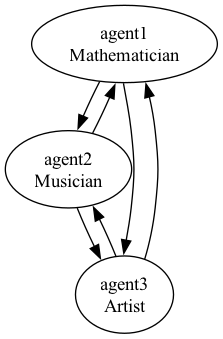

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Member(name="agent3", role="Artist", description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client) 

from IPython.display import Image
Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [8]:
g.group_messages.context

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [11]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
print('-'*50)
print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=2))

--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "ee70e66f-f845-4d76-943c-f492f7083057",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math.",
                "access_token": null
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music.",
                "access_token": null
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art.",
                "access_token": null
            }
        ],
        "relationships": {
            "agent1": [
     

In [5]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

Message(sender='agent2', action='talk', result='It seems you\'re looking for music recommendations, especially for reading. Music can greatly enhance the reading experience, creating a calming atmosphere that helps with concentration. Here are some genres and specific types of music that are often favored for reading:\n\n1. **Classical Music**: This genre is a popular choice due to its soothing melodies and lack of lyrics, which can be distracting. Composers like Johann Sebastian Bach, Claude Debussy, and Erik Satie are great options. Pieces like Bach\'s "Goldberg Variations" or Debussy\'s "Clair de Lune" can create a serene environment.\n\n2. **Ambient Music**: Artists such as Brian Eno, known for his ambient soundscapes, can provide a gentle background that fades into the background while you read. Albums like "Music for Airports" are specifically designed to be unobtrusive.\n\n3. **Instrumental Jazz**: Soft jazz can also be an excellent choice. Artists like Miles Davis or Bill Evans

In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent3', action='talk', result='Beauty is a complex and multifaceted concept that has been explored by philosophers, artists, and thinkers throughout history. At its core, beauty can be perceived as a quality that brings pleasure, harmony, and aesthetic enjoyment to the observer. It often elicits emotional responses and can be found in various forms, including nature, art, music, and human experiences.\n\nFrom a philosophical perspective, beauty has been debated in terms of its subjective versus objective nature. Some argue that beauty is entirely subjective, rooted in individual preferences and cultural contexts, while others believe there are universal standards of beauty that transcend personal opinion.\n\nIn the realm of art, beauty is often linked to balance, proportion, and the skillful use of color and form. Different artistic movements have defined beauty in unique ways, from the idealized forms of classical art to the raw and emotional expressions found in mode

In [7]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent1', action='talk', result="Beauty is indeed a profound topic that invites various interpretations and discussions. As a mathematician, I might approach beauty through the lens of symmetry, order, and mathematical elegance. In mathematics, beauty often manifests in the simplicity of a solution, the elegance of a theorem, or the harmony of a mathematical structure. \n\nFor instance, the Fibonacci sequence and its connection to the golden ratio can be seen as a beautiful representation of growth patterns in nature, such as in flowers and shells. This intersection of mathematics and nature highlights how beauty can be perceived in both abstract concepts and tangible forms.\n\nFurthermore, the aesthetic appeal of mathematical proofs, where a complex problem is solved through a series of elegant steps, also reflects a kind of beauty. The clarity and efficiency of a solution can evoke a sense of satisfaction similar to that found in art or music.\n\nIn my view, beauty in 

In [8]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

Message(sender='agent2', action='talk', result="As a musician, I find beauty in the intricate interplay of sound, melody, and emotion. Music has a unique ability to transcend language and cultural barriers, allowing us to connect deeply with one another on an emotional level. The beauty of music often lies in its capacity to evoke feelings, tell stories, and create atmospheres that resonate with our experiences.\n\nFrom a compositional standpoint, beauty can be found in the harmony of chords, the rhythm of a melody, and the dynamics of a performance. For instance, the way a crescendo builds tension before resolving into a gentle decrescendo can mirror the ebb and flow of life's emotions. Composers like Johann Sebastian Bach, with his intricate counterpoint, or Ludwig van Beethoven, with his passionate expressions, showcase how musical structures can be both complex and profoundly beautiful.\n\nFurthermore, the beauty of music often emerges in live performances, where the energy of the 

In [9]:
print('-'*50)
print(g.current_agent)
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=3))

--------------------------------------------------
agent2
--------------------------------------------------
### Background Information

This is a test environment

### Members

- agent1 (Mathematician)
- agent2 (Musician)
- agent3 (Artist)

### Your Previous Message

```agent2:talk
As a musician, I find beauty in the intricate interplay of sound, melody, and emotion. Music has a unique ability to transcend language and cultural barriers, allowing us to connect deeply with one another on an emotional level. The beauty of music often lies in its capacity to evoke feelings, tell stories, and create atmospheres that resonate with our experiences.

From a compositional standpoint, beauty can be found in the harmony of chords, the rhythm of a melody, and the dynamics of a performance. For instance, the way a crescendo builds tension before resolving into a gentle decrescendo can mirror the ebb and flow of life's emotions. Composers like Johann Sebastian Bach, with his intricate counterpoint

In [10]:
g.call_agent(agent="agent1",model="gpt-4o-mini")

Message(sender='agent1', action='talk', result='As a mathematician, I perceive beauty through the clarity and elegance of mathematical truths. The structure of a well-crafted proof or the surprising connections between seemingly disparate areas of mathematics can evoke a sense of wonder akin to that experienced in art or music. For instance, the relationship between prime numbers and the distribution of natural numbers is a beautiful manifestation of order in chaos.\n\nMoreover, the aesthetic quality of mathematical objects, such as geometric shapes or fractals, illustrates how mathematical concepts can be visually striking. The symmetry of a circle or the intricate patterns of a Mandelbrot set reveal a harmony that resonates with our appreciation for beauty in nature.\n\nIn my view, beauty in mathematics transcends mere numbers and formulas; it lies in the insights they provide into the universe. Just as an artist or musician captures emotions through their medium, mathematicians expr